In [24]:
import numpy as np

In [25]:
v = np.array([4., -9., 2.])
v_norm = np.linalg.norm(v)
print(v, v_norm)

[ 4. -9.  2.] 10.04987562112089


In [26]:
ijk = v/v_norm
print(ijk)

[ 0.39801488 -0.89553347  0.19900744]


In [27]:
np.arccos(ijk)

array([1.16144441, 2.68042491, 1.37045133])

In [28]:
x = np.array([[1,2,3],
              [2,3,4],
              [3,4,5],
              [4,5,6]]).astype('float')
y = np.array([5,6,7])

In [29]:
x@y

array([38., 56., 74., 92.])

In [30]:
a = np.array([1,2,8])
b = np.array([6,5,4])

In [31]:
print(a*b)
print(np.cross(a, b))
print(a@b)

[ 6 10 32]
[-32  44  -7]
48


In [32]:
print(np.linalg.norm(a))
print(np.linalg.norm(b))
print(np.linalg.norm(a)+np.linalg.norm(b))

8.306623862918075
8.774964387392123
17.081588250310197


In [33]:
c = np.cross(a, b)
print(np.linalg.norm(c))

54.85435260760991


In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

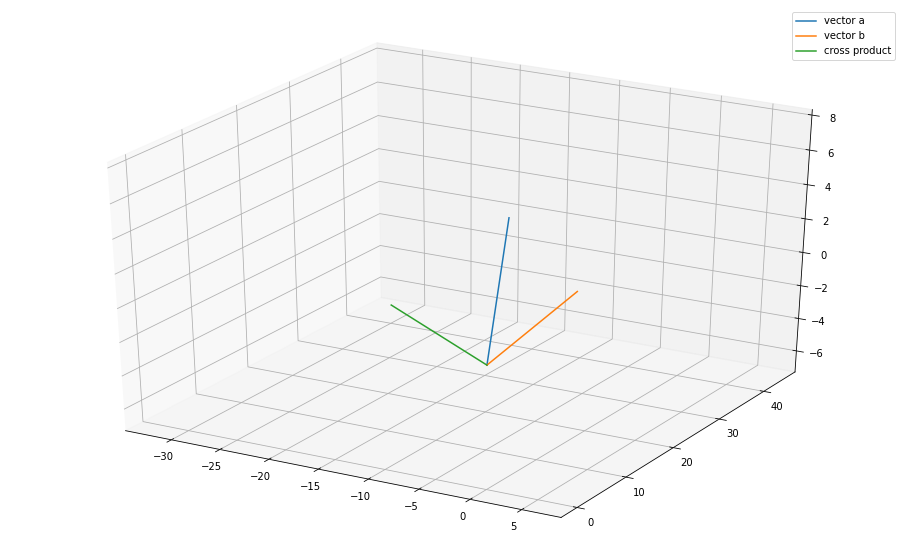

In [35]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*(np.insert(a.reshape((3,1)), 0, [0,0,0], axis=1)), label='vector a')
ax.plot(*(np.insert(b.reshape((3,1)), 0, [0,0,0], axis=1)), label='vector b')
ax.plot(*(np.insert(c.reshape((3,1)), 0, [0,0,0], axis=1)), label='cross product')
plt.legend()
plt.show()

In [36]:
phi = np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
print(phi)

0.85194111954682


In [37]:
print(np.linalg.norm(np.cross(a, b)))
print(np.linalg.norm(a)*np.linalg.norm(b)*np.sin(phi))

54.85435260760991
54.854352607609925


In [55]:
def plot2dv(*vectors, labels=None):
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(111)
    for vector in vectors:
        if vector.shape != (2,2):
            ax.plot(*np.insert(vector.reshape((2,1)), 0, [0,0], axis=1))
        else:
            ax.plot(*vector, 'r--')
    if labels != None:
        ax.legend([i for i in labels])
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    plt.grid()
    plt.axis('equal')
    plt.show()

In [56]:
d = np.array([1,6])
e = np.array([3,2])

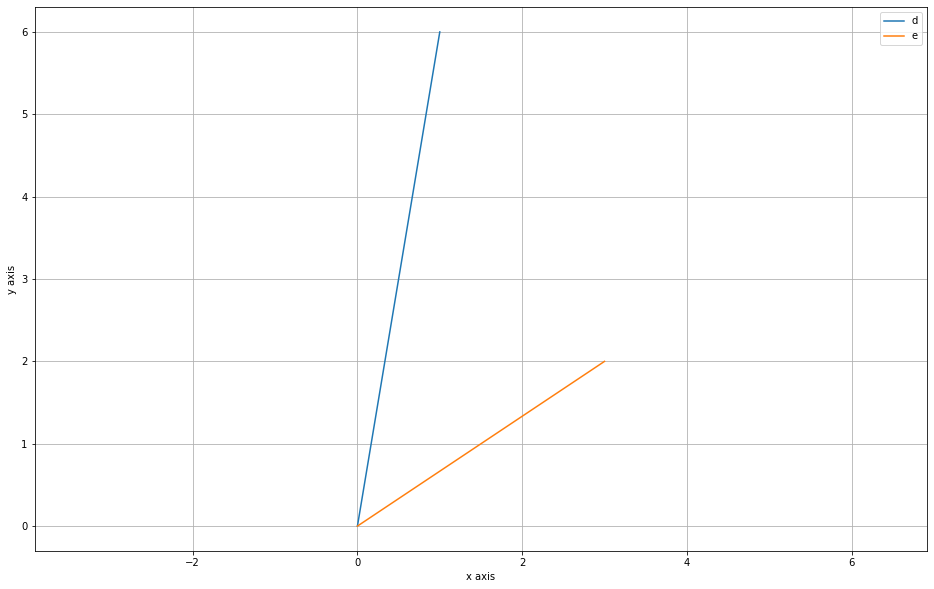

In [57]:
plot2dv(d, e, labels=['d', 'e'])

In [41]:
d_hat = d/np.linalg.norm(d) # unit vector of d
print(d_hat)
e_proj = np.dot(d_hat, e) # projected length of e perpendicular to d
print(e_proj)

[0.16439899 0.98639392]
2.4659848095803594


In [42]:
d_coord = e_proj * d_hat # projected vector of e
print(d_coord)
proj_line = np.array([[e[0], d_coord[0]],
                      [e[1], d_coord[1]]])

[0.40540541 2.43243243]


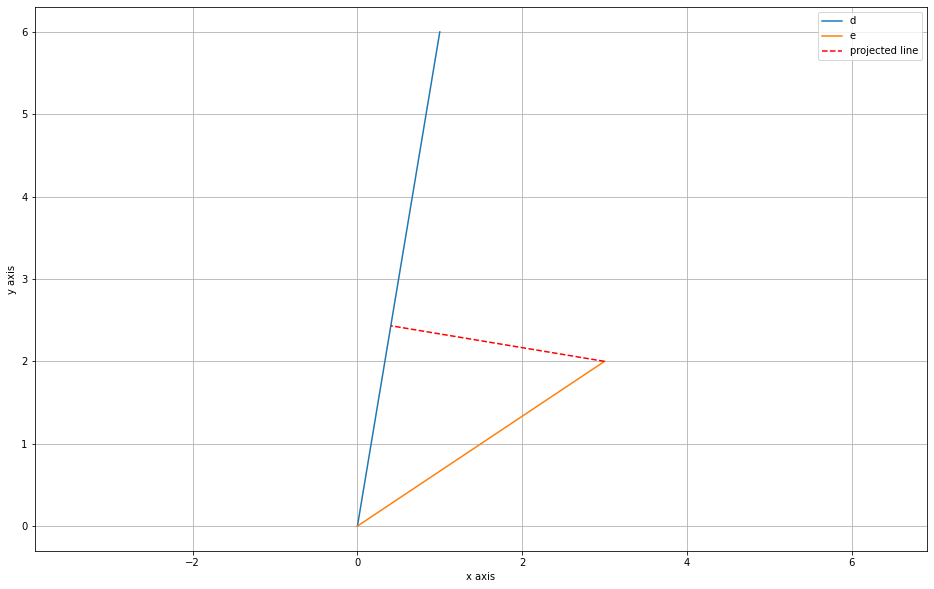

In [58]:
plot2dv(d, e, proj_line, labels=['d','e','projected line'])

In [44]:
e_hat = e/np.linalg.norm(e)
d_proj = np.dot(e_hat, d)
print(d_proj)

4.160251471689219


In [45]:
e_coord = d_proj* e_hat
proj_line_de = np.array([[d[0], e_coord[0]],
                         [d[1], e_coord[1]]])

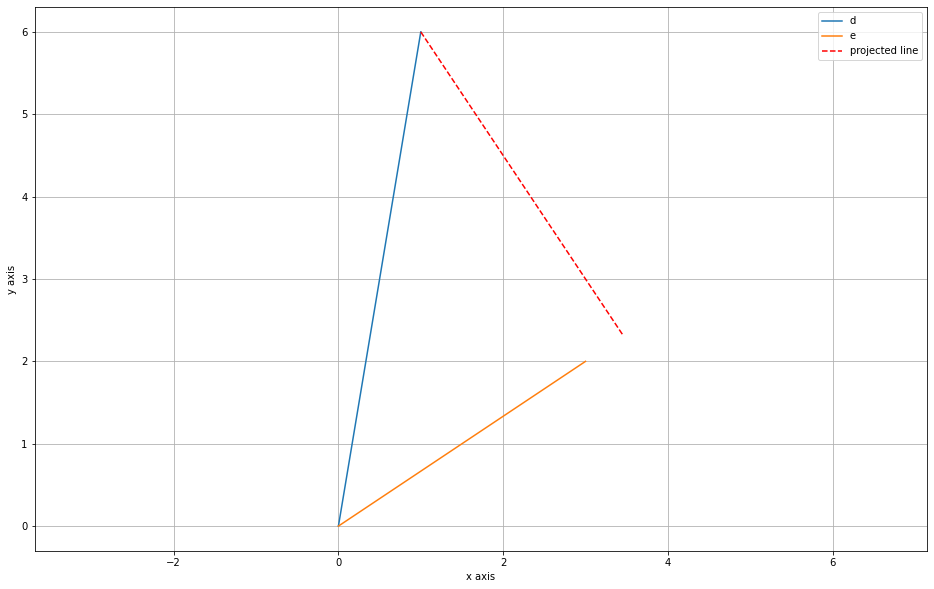

In [59]:
plot2dv(d, e, proj_line_de, labels=['d','e','projected line'])

In [47]:
mcs = np.genfromtxt('mcs.txt', delimiter=';')
print(mcs, mcs.shape)

[-949.1695 2796.1808 1255.3002   90.0276    5.7413  241.0426] (6,)


In [48]:
e1 = np.deg2rad(mcs[3])
e2 = np.deg2rad(mcs[4])
e4 = np.deg2rad(mcs[5])
trans_xyz = mcs[:3]

In [49]:
Rz_e1 = np.array([[np.cos(e1), -np.sin(e1), 0],
                  [np.sin(e1), np.cos(e1), 0],
                  [0, 0, 1]])
Rx_e2 = np.array([[1, 0, 0],
                  [0, np.cos(e2), -np.sin(e2)],
                  [0, np.sin(e2), np.cos(e2)]])
Rz_e4 = np.array([[np.cos(e4), -np.sin(e4), 0],
                  [np.sin(e4), np.cos(e4), 0],
                  [0, 0, 1]])
R = Rz_e1@Rx_e2@Rz_e4

In [50]:
print(R)

[[ 8.70823905e-01  4.81308976e-01  1.00036969e-01]
 [-4.83739768e-01  8.75211880e-01  4.81888996e-05]
 [-8.75303501e-02 -4.84338244e-02  9.94983720e-01]]


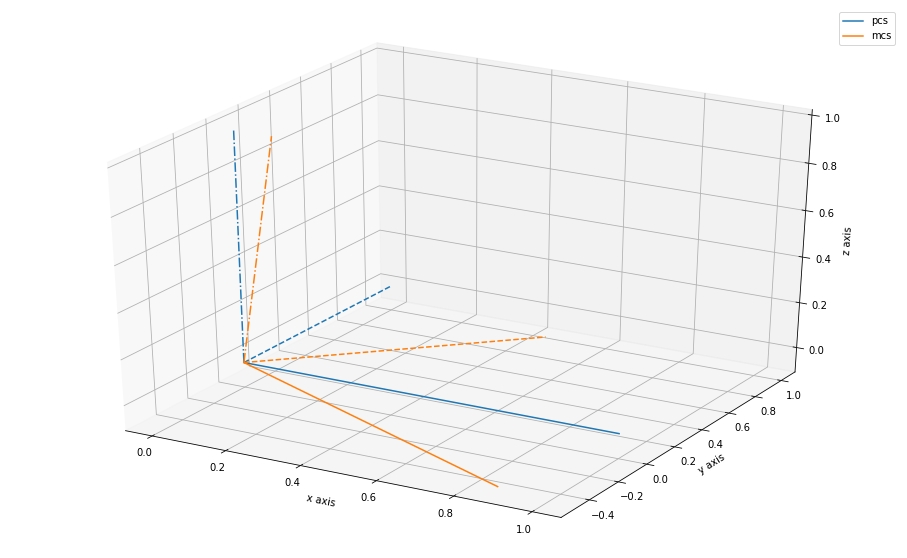

In [51]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.plot([0, 1], [0, 0], [0, 0], color='C0', ls='-', label='pcs')
ax.plot([0, 0], [0, 1], [0, 0], color='C0', ls='--')
ax.plot([0, 0], [0, 0], [0, 1], color='C0', ls='-.')
ax.plot([0, R[0, 0]], [0, R[1, 0]], [0, R[2, 0]], color='C1', ls='-', label='mcs')
ax.plot([0, R[0, 1]], [0, R[1, 1]], [0, R[2, 1]], color='C1', ls='--')
ax.plot([0, R[0, 2]], [0, R[1, 2]], [0, R[2, 2]], color='C1', ls='-.')
ax.legend()
plt.show()

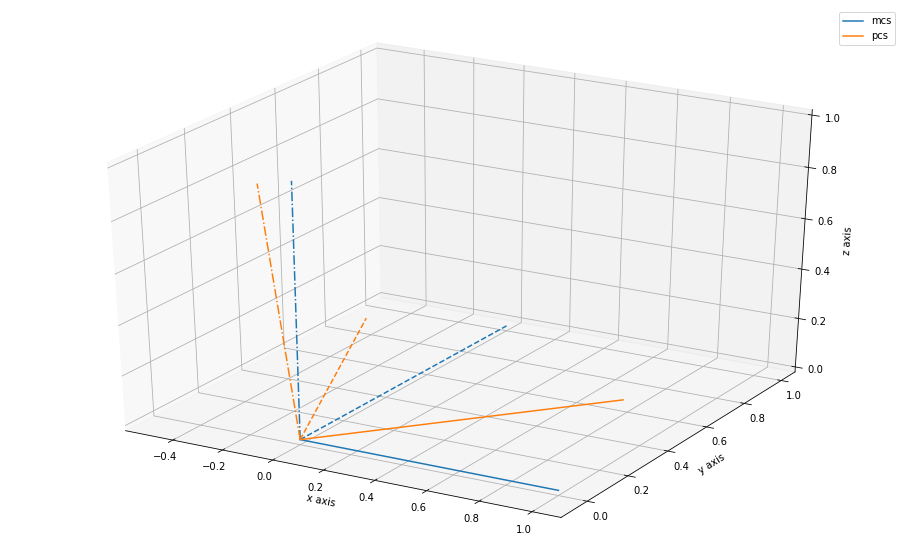

In [52]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.plot([0, 1], [0, 0], [0, 0], color='C0', ls='-', label='mcs')
ax.plot([0, 0], [0, 1], [0, 0], color='C0', ls='--')
ax.plot([0, 0], [0, 0], [0, 1], color='C0', ls='-.')
ax.plot([0, R[0, 0]], [0, R[0, 1]], [0, R[0, 2]], color='C1', ls='-', label='pcs')
ax.plot([0, R[1, 0]], [0, R[1, 1]], [0, R[1, 2]], color='C1', ls='--')
ax.plot([0, R[2, 0]], [0, R[2, 1]], [0, R[2, 2]], color='C1', ls='-.')
ax.legend()
plt.show()